In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mtsamples.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB
None


In [5]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


Check for missing values

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


Remove missing values

In [7]:
df = df.dropna(subset=['transcription'])

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64


Remove Unnecessary Columns

In [9]:
df.drop(columns=['Unnamed: 0', 'sample_name', 'keywords', 'description'], inplace=True)

In [10]:
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


Explore the target (Medical Specialty)

In [11]:
print("\nDistribution of Target Variable:")
print(df['medical_specialty'].value_counts())


Distribution of Target Variable:
medical_specialty
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Dentistry                          2

C:\Users\NourH\AppData\Local\Temp\ipykernel_1260\2299392311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index, palette='viridis')


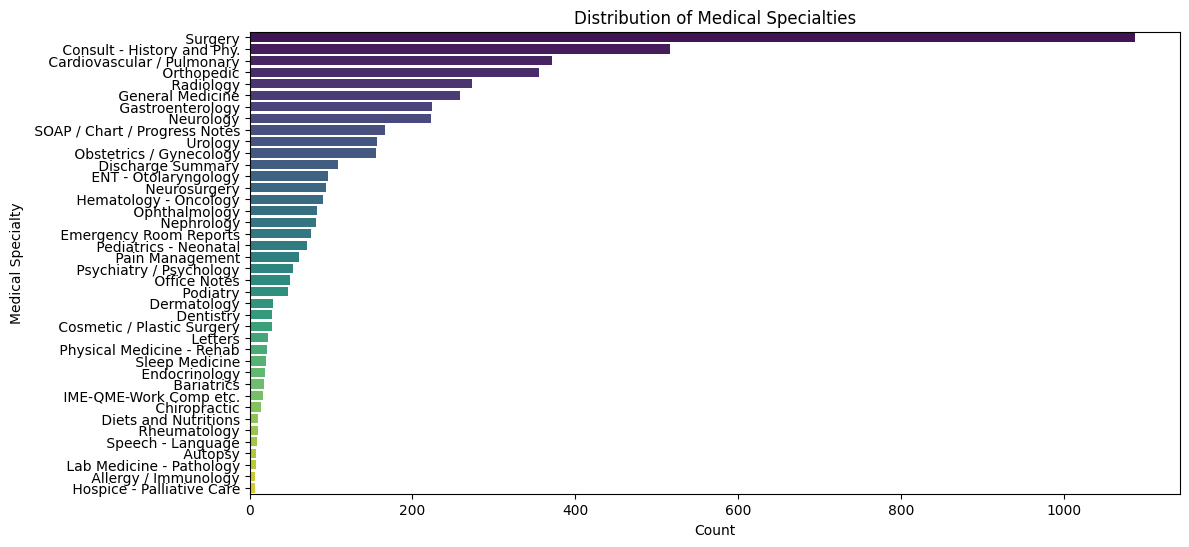

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().index, palette='viridis')
plt.title('Distribution of Medical Specialties')
plt.xlabel('Count')
plt.ylabel('Medical Specialty')
plt.show()


Explore Input Text (Transcription)

In [13]:
df['text_length'] = df['transcription'].apply(len)
print("\nText Length Statistics:")
print(df['text_length'].describe())


Text Length Statistics:
count     4966.000000
mean      3052.314337
std       1994.082239
min         11.000000
25%       1608.000000
50%       2667.000000
75%       4011.000000
max      18425.000000
Name: text_length, dtype: float64


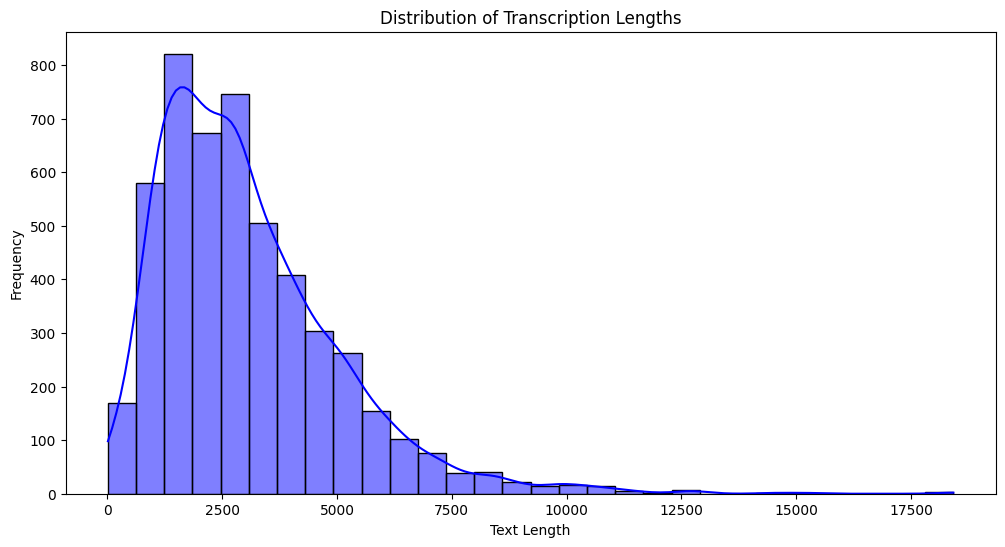

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Transcription Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [15]:
df = df.drop('text_length', axis=1)
df.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


# Preprocessing the dataset

In [16]:
import re
from nltk.tokenize import SpaceTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer, LancasterStemmer
import spacy
from krovetzstemmer import Stemmer 



In [17]:
# Cleaning up the text

def make_text_small(text):
    text = text.lower().strip()
    text = ' '.join(text.split())
    return text

def remove_special_chars(text):
    # Keep only letters, numbers, comma, period, dash and spaces
    return re.sub(r'[^a-zA-Z0-9\s,.\-/]', '', text)

def cleanup(text):
    text = make_text_small(text)
    text = remove_special_chars(text)
    return text

def extra_cleanup(text):
    text = make_text_small(text)
    text = text.replace('-', ' ')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

In [18]:
# Tokenization Utils

def split_word_tokenize(text):
    return text.split()

def split_comma_period_tokenize(text):
    return re.split(r'[,.]', text)

def space_tokenize(text):
    return SpaceTokenizer().tokenize(text)

def punkt_tokenize(text):
    return PunktSentenceTokenizer().tokenize(text)

In [19]:
# Stopwords removal

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    cleaned_text = [word for word in split_word_tokenize(text) if word not in stop_words]
    return cleaned_text

In [20]:
# Stemming
# All of these require word tokenization first.

def stem_porter(text):
    # print("Porter Stemmer Working")
    # print("Text is: ")
    # print(text)
    porter = PorterStemmer()
    return [' '.join([porter.stem(token) for token in text])]


def stem_snowball(text):
    # print("Snowball Stemmer Working")
    # print("Text is: ")
    # print(text)
    snowball = SnowballStemmer('english')
    # print([' '.join([snowball.stem(token) for token in text])])
    return [' '.join([snowball.stem(token) for token in text])]

def stem_krovetz(text):
    # print("Krovetz Stemmer Working")
    # print("Text is: ")
    # print(text)
    krovetz = Stemmer() 
    return [' '.join([krovetz.stem(token) for token in text])]

def stem_lancaster(text):
    # print("Lancaster Stemmer Working")
    # print("Text is: ")
    # print(text)
    lancaster = LancasterStemmer()
    return [' '.join([lancaster.stem(token) for token in text])]



In [21]:
#Lemmatization

# Initialize lemmatizers
wordnet_lemmatizer = WordNetLemmatizer()
spacy_nlp = spacy.load('en_core_web_sm')

# # Apply WordNet Lemmatizer
# df['transcription'] = df['transcription'].apply(
#     lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()])
# )

# # Apply SpaCy Lemmatizer
# df['transcription'] = df['transcription'].apply(
#     lambda x: ' '.join([token.lemma_ for token in spacy_nlp(x)])
# )

In [22]:
def preprocess(text):
    text = cleanup(text)
    text = space_tokenize(text)
    # text = punkt_tokenize(text)
    # text = remove_stopwords(text)
    # text = stem_porter(text)
    text = stem_snowball(text)
    return text

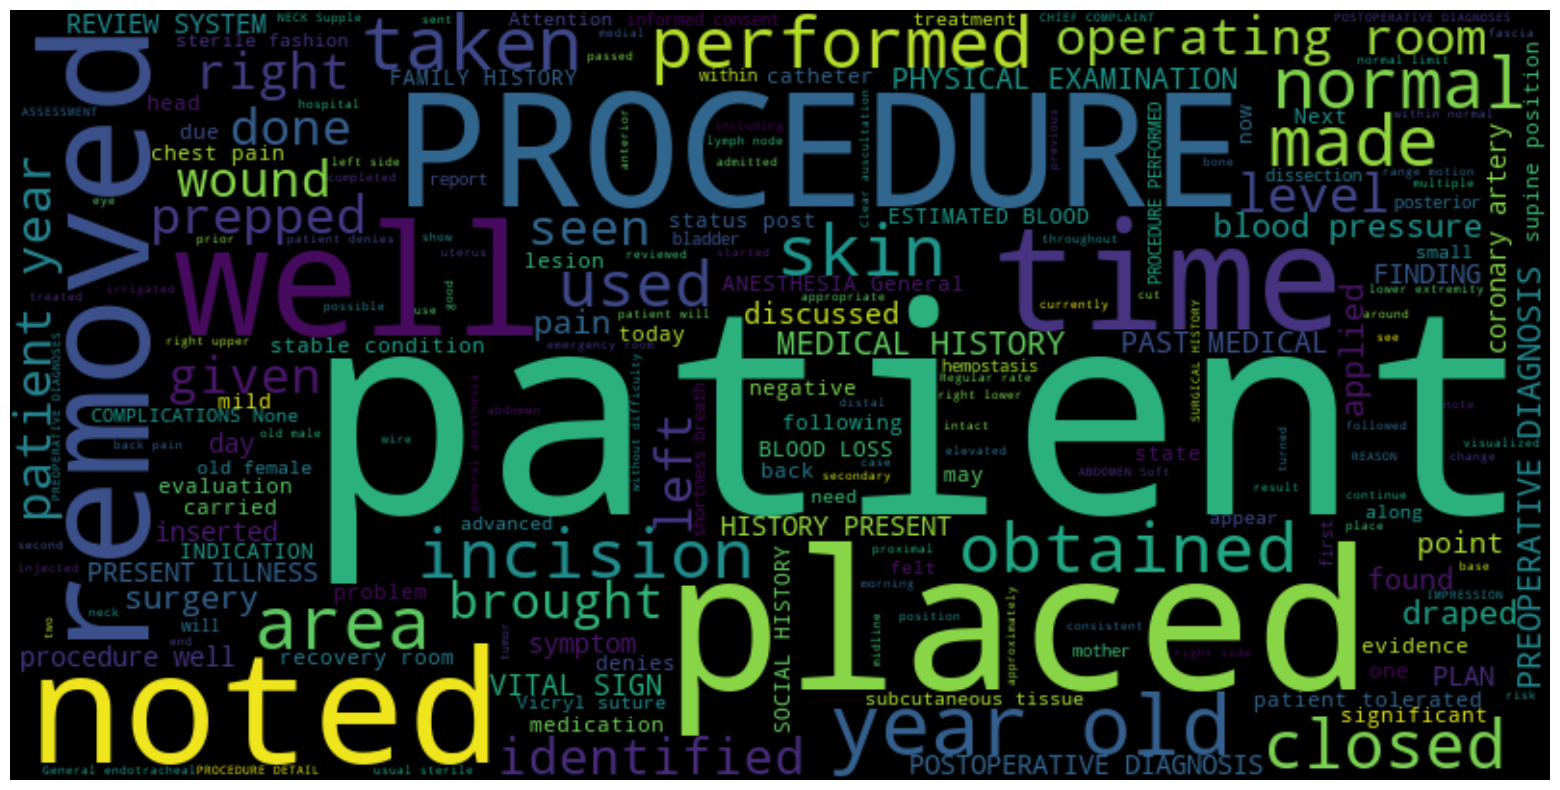

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all words from transcription column
all_words = " ".join(df['transcription'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black', min_word_length=3).generate(all_words)

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
df.head(10)

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
5,Bariatrics,"PREOPERATIVE DIAGNOSIS: , Morbid obesity.,POST..."
6,Bariatrics,"PREOPERATIVE DIAGNOSES:,1. Deformity, right b..."
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
8,Bariatrics,"PREOPERATIVE DIAGNOSIS: , Lipodystrophy of the..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."


In [25]:
# Apply preprocessing to the dataset
# df['transcription'] = df['transcription'].apply(preprocess)
df['transcription'] = df['transcription'].apply(extra_cleanup)
df['medical_specialty'] = df['medical_specialty'].apply(cleanup)

In [26]:
df.head(10)

,medical_specialty,transcription
0,allergy / immunology,subjective this year old white female present...
1,bariatrics,past medical history he has difficulty climbin...
2,bariatrics,history of present illness i have seen abc to...
3,cardiovascular / pulmonary,d m mode left atrial enlargement with left ...
4,cardiovascular / pulmonary,the left ventricular cavity size and wall thi...
5,bariatrics,preoperative diagnosis morbid obesitypostoper...
6,bariatrics,preoperative diagnoses deformity right breast ...
7,cardiovascular / pulmonary,d echocardiogrammultiple views of the heart a...
8,bariatrics,preoperative diagnosis lipodystrophy of the a...
9,cardiovascular / pulmonary,description normal cardiac chambers size norma...


### Ideas for experiments:
1. No preprocessing
2. Tokenize by word
3. Tokenize by sentence
4. Tokenize with SpaceTokenizer
5. Tokenize with PunktTokenizer
6. Keep stopwords
7. Remove stopwords
8. Stemming 1
9. Stemming 2
10. Lemmatization 1
11. Lemmatization 2
12. TF IDF Vectorizer
13. Count Vectorizer
14. Hashing Vectorizer
15. X

## Machine Learning

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [28]:
# Encode the 'medical_specialty' column
label_encoder = LabelEncoder()
df['medical_specialty_encoded'] = label_encoder.fit_transform(df['medical_specialty'])

# Verify encoding
print("Classes encoded as:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Classes encoded as:
{'allergy / immunology': np.int64(0), 'autopsy': np.int64(1), 'bariatrics': np.int64(2), 'cardiovascular / pulmonary': np.int64(3), 'chiropractic': np.int64(4), 'consult - history and phy.': np.int64(5), 'cosmetic / plastic surgery': np.int64(6), 'dentistry': np.int64(7), 'dermatology': np.int64(8), 'diets and nutritions': np.int64(9), 'discharge summary': np.int64(10), 'emergency room reports': np.int64(11), 'endocrinology': np.int64(12), 'ent - otolaryngology': np.int64(13), 'gastroenterology': np.int64(14), 'general medicine': np.int64(15), 'hematology - oncology': np.int64(16), 'hospice - palliative care': np.int64(17), 'ime-qme-work comp etc.': np.int64(18), 'lab medicine - pathology': np.int64(19), 'letters': np.int64(20), 'nephrology': np.int64(21), 'neurology': np.int64(22), 'neurosurgery': np.int64(23), 'obstetrics / gynecology': np.int64(24), 'office notes': np.int64(25), 'ophthalmology': np.int64(26), 'orthopedic': np.int64(27), 'pain management': np.int6

In [29]:
# Features (X) and Target (y)
X = df['transcription']  # Use the processed text column (lemmatized/stemmed/raw)
y = df['medical_specialty_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}\nTest set size: {len(X_test)}")


Training set size: 3972
Test set size: 994


TF IDF Vectorizer

In [30]:
# # Initialize TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

# # If 'transcription' contains lists, join them into a single string
# df['transcription'] = df['transcription'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


# # Fit and transform the text data
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

# print("TF-IDF Transformation Complete!")


Count Vectorizer

In [31]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(max_features=5000)
# X_train_counts = count_vectorizer.fit_transform(X_train)
# X_test_counts = count_vectorizer.transform(X_test)


Hashing Vectorizer

In [32]:
# from sklearn.feature_extraction.text import HashingVectorizer

# hashing_vectorizer = HashingVectorizer(n_features=5000)
# X_train_hashed = hashing_vectorizer.transform(X_train)
# X_test_hashed = hashing_vectorizer.transform(X_test)


In [33]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

## Experiment #1 - Count Vectorizer

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)


# Fit the model
decision_tree.fit(X_train_counts, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test_counts)

# Evaluate performance
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.07


## Experiment #2 - Hashing Vectorizer

In [35]:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_vectorizer = HashingVectorizer(n_features=5000)
X_train_hashed = hashing_vectorizer.transform(X_train)
X_test_hashed = hashing_vectorizer.transform(X_test)


# Fit the model
decision_tree.fit(X_train_hashed, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test_hashed)

# Evaluate performance
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.06


## Experiment #3 - TF-IDF Vectorizer

In [36]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Fit the model
decision_tree.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test_tfidf)

# Evaluate performance
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.06


## Experiment #4 - Krovetz Stemmer, Hashing Vectorizer

In [37]:
from sklearn.feature_extraction.text import HashingVectorizer
from krovetzstemmer import Stemmer 

krovetz = Stemmer()

X_train_krovetz = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_train]
X_test_krovetz = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_test]

hashing_vectorizer = HashingVectorizer(n_features=5000)
X_train_hashed = hashing_vectorizer.transform(X_train_krovetz)
X_test_hashed = hashing_vectorizer.transform(X_test_krovetz)

# Fit the model
decision_tree.fit(X_train_hashed, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test_hashed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.06


## Experiment #5 - Krovetz Stemmer, TF-IDF Vectorizer

In [38]:
from sklearn.feature_extraction.text import HashingVectorizer
from krovetzstemmer import Stemmer 

krovetz = Stemmer()

X_train_krovetz = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_train]
X_test_krovetz = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_test]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_krovetz)
X_test_tfidf = tfidf_vectorizer.transform(X_test_krovetz)

decision_tree.fit(X_train_hashed, y_train)

y_pred = decision_tree.predict(X_test_hashed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.06


## Experiment #6 - Lancaster Stemmer, TF-IDF Vectorizer

In [39]:
lancaster = LancasterStemmer()

X_train_lancaster = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_train]
X_test_lancaster = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_test]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_ln = tfidf_vectorizer.fit_transform(X_train_lancaster)
X_test_tfidf_ln = tfidf_vectorizer.transform(X_test_lancaster)

decision_tree.fit(X_train_tfidf_ln, y_train)

y_pred = decision_tree.predict(X_test_tfidf_ln)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.06


## Experiment #7 - Stopword removal, Lancaster Stemmer, TF-IDF Vectorizer

In [43]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

lancaster = LancasterStemmer()

X_train_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_test_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_ln_no_stop = tfidf_vectorizer.fit_transform(X_train_lancaster_no_stop)
X_test_tfidf_ln_no_stop = tfidf_vectorizer.transform(X_test_lancaster_no_stop)

decision_tree.fit(X_train_tfidf_ln_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_ln_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.06


## Experiment #8 - Stopword removal, Lancaster Stemmer, TF-IDF Vectorizer, Wordnet Lemmatizer


In [44]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

lancaster = LancasterStemmer()

X_train_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_test_no_stop]

lemmatizer = WordNetLemmatizer()

X_train_lemm_lanc_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_train_lancaster_no_stop]
X_test_lemm_lanc_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test_lancaster_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_ln_no_stop = tfidf_vectorizer.fit_transform(X_train_lemm_lanc_no_stop)
X_test_tfidf_ln_no_stop = tfidf_vectorizer.transform(X_test_lemm_lanc_no_stop)

decision_tree.fit(X_train_tfidf_ln_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_ln_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #9 - Stopword removal, Krovetz Stemmer, TF-IDF Vectorizer, Wordnet Lemmatizer


In [45]:
from krovetzstemmer import Stemmer
 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

krovetz = Stemmer()

X_train_krevitz_no_stop = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_krevitz_no_stop = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_test_no_stop]

lemmatizer = WordNetLemmatizer()

X_train_lemm_krev_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_train_krevitz_no_stop]
X_test_lemm_krev_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test_krevitz_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_kn_no_stop = tfidf_vectorizer.fit_transform(X_train_lemm_krev_no_stop)
X_test_tfidf_kn_no_stop = tfidf_vectorizer.transform(X_test_lemm_krev_no_stop)

decision_tree.fit(X_train_tfidf_kn_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_kn_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #10 - Stopword removal, Lancaster Stemmer, TF-IDF Vectorizer, SpaCy Lemmatizer


In [46]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

lancaster = LancasterStemmer()

X_train_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_lancaster_no_stop = [' '.join([lancaster.stem(word) for word in text.split()]) for text in X_test_no_stop]

import spacy
nlp = spacy.load('en_core_web_sm')

X_train_lemm_lanc_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_train_lancaster_no_stop]
X_test_lemm_lanc_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_test_lancaster_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_ln_no_stop = tfidf_vectorizer.fit_transform(X_train_lemm_lanc_no_stop)
X_test_tfidf_ln_no_stop = tfidf_vectorizer.transform(X_test_lemm_lanc_no_stop)

decision_tree.fit(X_train_tfidf_ln_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_ln_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #11 - Stopword removal, Lancaster Stemmer, Count Vectorizer, SpaCy Lemmatizer


In [48]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

from krovetzstemmer import Stemmer
krovetz = Stemmer()

X_train_krovetz_no_stop = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_krovetz_no_stop = [' '.join([krovetz.stem(word) for word in text.split()]) for text in X_test_no_stop]

import spacy
nlp = spacy.load('en_core_web_sm')

X_train_lemm_krov_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_train_krovetz_no_stop]
X_test_lemm_krov_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_test_krovetz_no_stop]

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count_kn_no_stop = count_vectorizer.fit_transform(X_train_lemm_krov_no_stop)
X_test_count_kn_no_stop = count_vectorizer.transform(X_test_lemm_krov_no_stop)

decision_tree.fit(X_train_count_kn_no_stop, y_train)

y_pred = decision_tree.predict(X_test_count_kn_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #12 - Stopword removal, Count Vectorizer, SpaCy Lemmatizer


In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

import spacy
nlp = spacy.load('en_core_web_sm')

X_train_lemm_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_train_no_stop]
X_test_lemm_no_stop = [' '.join([token.lemma_ for token in nlp(' '.join([word for word in text.split()]))]) for text in X_test_no_stop]

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count_lemm_no_stop = count_vectorizer.fit_transform(X_train_lemm_no_stop)
X_test_count_lemm_no_stop = count_vectorizer.transform(X_test_lemm_no_stop)

decision_tree.fit(X_train_count_lemm_no_stop, y_train)

y_pred = decision_tree.predict(X_test_count_lemm_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #13 - Stopword removal, Count Vectorizer, Wordnet Lemmatizer


In [50]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

X_train_lemm_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_train_no_stop]
X_test_lemm_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test_no_stop]

count_vectorizer = CountVectorizer(max_features=5000)

X_train_count_lemm_no_stop = count_vectorizer.fit_transform(X_train_lemm_no_stop)
X_test_count_lemm_no_stop = count_vectorizer.transform(X_test_lemm_no_stop)

decision_tree.fit(X_train_count_lemm_no_stop, y_train)

y_pred = decision_tree.predict(X_test_count_lemm_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07


## Experiment #14 - Stopword removal, TF IDF Vectorizer, Wordnet Lemmatizer


In [51]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

X_train_lemm_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_train_no_stop]
X_test_lemm_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_lemm_no_stop = tfidf_vectorizer.fit_transform(X_train_lemm_no_stop)
X_test_tfidf_lemm_no_stop = tfidf_vectorizer.transform(X_test_lemm_no_stop)

decision_tree.fit(X_train_tfidf_lemm_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_lemm_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.06


## Experiment #15 - Stopword removal, Porter Stemmer, TF IDF Vectorizer, Wordnet Lemmatizer


In [52]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

X_train_no_stop = X_train.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
X_test_no_stop = X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

X_train_stem_no_stop = [' '.join([stemmer.stem(word) for word in text.split()]) for text in X_train_no_stop]
X_test_stem_no_stop = [' '.join([stemmer.stem(word) for word in text.split()]) for text in X_test_no_stop]

X_train_lemm_stem_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_train_stem_no_stop]
X_test_lemm_stem_no_stop = [' '.join([lemmatizer.lemmatize(word) for word in text.split()]) for text in X_test_stem_no_stop]

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf_lemm_no_stop = tfidf_vectorizer.fit_transform(X_train_lemm_stem_no_stop)
X_test_tfidf_lemm_no_stop = tfidf_vectorizer.transform(X_test_lemm_stem_no_stop)

decision_tree.fit(X_train_tfidf_lemm_no_stop, y_train)

y_pred = decision_tree.predict(X_test_tfidf_lemm_no_stop)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.07
